<a href="https://colab.research.google.com/github/umiSirya/MachineLearning-1/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [3]:
housing = pd.read_csv("/content/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#find null values in dataset
housing.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
#duplicated values
housing.duplicated().sum()

0

In [6]:
#columns in the dataset
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
#datatypes of housing
housing.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [8]:
#columns with categorical data
housing.select_dtypes(include=['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
housing['furnishingstatus'].unique()


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [11]:
#using one hot encoding for the listed columns as )and 1 for true and false
columns= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing = pd.get_dummies(housing, columns=columns, drop_first=True)
# display columns created after one hot encoding with 1s and 0s where necessary


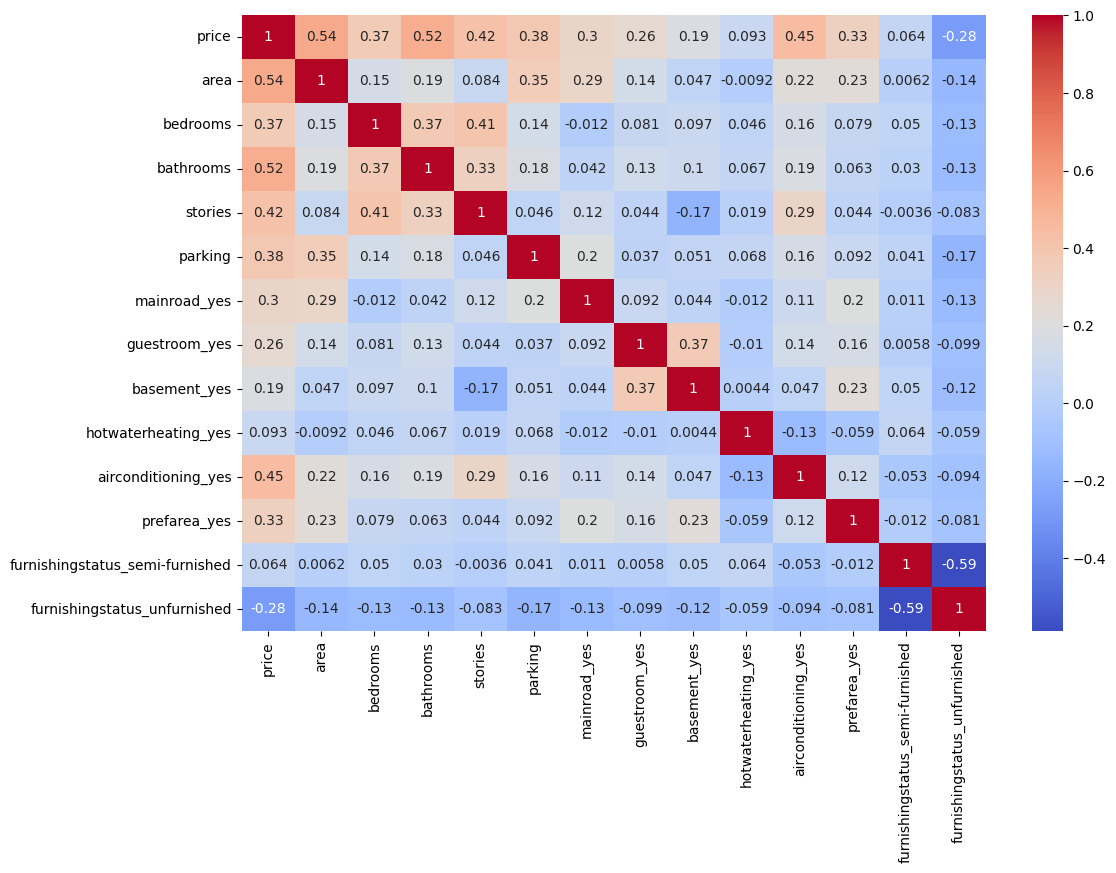

In [12]:
#create a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')

plt.show()


In [13]:
housing['price'].unique()

#price for value in first column
housing['price'][0]

13300000

**Linear Regression**

In [14]:
housing['price'].min()

1750000

In [15]:
housing['price'].max()

13300000

In [16]:

from sklearn.model_selection import train_test_split

# Remove the target variable ('price') from the dataset to create the feature set (X)
X = housing.drop('price', axis=1)

# Extract the target variable ('price') for prediction
y = housing['price']

#split my data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#initialize and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(X_train, y_train)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to RMSE
cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse)
print("Average Cross-Validation RMSE:", cv_rmse.mean())

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE, RMSE and R-squared for the test set
mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = model.score(X_test, y_test)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {test_rmse}")
print(f"R-squared (Test): {test_r2}")



Cross-Validation RMSE Scores: [1046715.85437732  970703.9652245   787585.6191889  1175436.91913762
 1128439.49433705]
Average Cross-Validation RMSE: 1021776.370453079
Test MSE: 1754318687330.6638
Test RMSE: 1324506.9600914386
R-squared (Test): 0.6529242642153184


In [34]:
# Display the predicted prices
print("Predicted Prices:")
#print(y_pred)

# give the predicted value for the first record in
print("Predicted Price for the first record:", y_pred[0])

# actual price for first record
print("Actual Price for the first record:", y_test[0])


Predicted Prices:
Predicted Price for the first record: 5164654.896876325
Actual Price for the first record: 13300000


**Lasso**

In [33]:
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

#  Predict the values using the trained model
y_pred = lasso.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) for error handling
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#calculate r-squared
r2 = lasso.score(X_test, y_test)
print(f'R-squared: {r2}')

#display the predicted values vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())

#output the coefficients to understand the impact of each feature
print(f'Lasso Coefficients: {lasso.coef_}')

Mean Squared Error: 1754318945367.533
R-squared: 0.6529242131651091
      Actual     Predicted
316  4060000  5.164655e+06
77   6650000  7.224721e+06
360  3710000  3.109864e+06
90   6440000  4.612076e+06
493  2800000  3.294646e+06
Lasso Coefficients: [ 2.35968915e+02  7.67786413e+04  1.09444448e+06  4.07476694e+05
  2.24841933e+05  3.67919264e+05  2.31609556e+05  3.90251154e+05
  6.84647634e+05  7.91426336e+05  6.29890149e+05 -1.26880906e+05
 -4.13644227e+05]


**Ridge Regression**

In [31]:
from sklearn.linear_model import Ridge, RidgeCV

# Cross-validation to find the best alpha
ridge_cv = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get the best alpha and retrain the Ridge model
best_alpha = ridge_cv.alpha_
print(f"Optimal alpha: {best_alpha}")

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Cross-validation scores (for evaluation)
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Average CV MSE: {-cv_scores.mean()}")

# Optionally, display the predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())

Optimal alpha: 1.0
Mean Squared Error: 1756474279575.2856
Cross-Validation MSE Scores: [6.89852717e+12 9.44242508e+11 8.66923409e+11 8.64132188e+11
 1.05656340e+12]
Average CV MSE: 2126077735570.3706
      Actual     Predicted
316  4060000  5.173868e+06
77   6650000  7.203148e+06
360  3710000  3.112871e+06
90   6440000  4.611232e+06
493  2800000  3.296686e+06


Elastic Net

In [37]:
from sklearn.linear_model import ElasticNet, ElasticNetCV


# Set alpha and l1_ratio manually
alpha = 0.1
l1_ratio = 0.5

# Train the ElasticNet model
elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elasticnet.fit(X_train, y_train)

# Make predictions
y_pred = elasticnet.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Perform cross-validation
cv_scores = cross_val_score(elasticnet, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Average CV MSE: {-cv_scores.mean()}")

#display the predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())

Mean Squared Error: 1811687440583.377
Cross-Validation MSE Scores: [7.53829140e+12 8.59025083e+11 7.98495017e+11 8.22324697e+11
 1.22695643e+12]
Average CV MSE: 2249018526393.171
      Actual     Predicted
316  4060000  5.277115e+06
77   6650000  6.866477e+06
360  3710000  3.165886e+06
90   6440000  4.608745e+06
493  2800000  3.341165e+06
